## Importar librerias y archivo de trafico

In [1]:
import pandas as pd

# Ruta al archivo CSV
file_path = 'Automated_Traffic_Volume_Counts_20241108.csv'

# Leer el archivo CSV
df = pd.read_csv(file_path)

# Mostrar las columnas del dataset
print("Columnas del dataset:")
print(df.columns)

# Mostrar las primeras filas del dataset para tener una idea de los datos
print("\nPrimeras filas del dataset:")
print(df.head())



Columnas del dataset:
Index(['RequestID', 'Boro', 'Yr', 'M', 'D', 'HH', 'MM', 'Vol', 'SegmentID',
       'WktGeom', 'street', 'fromSt', 'toSt', 'Direction'],
      dtype='object')

Primeras filas del dataset:
   RequestID    Boro    Yr  M   D  HH  MM  Vol  SegmentID  \
0      32970  Queens  2021  4  30   2   0    0     149701   
1      32970  Queens  2021  4  30   2  15    1     149701   
2      32970  Queens  2021  4  30   2  30    0     149701   
3      32970  Queens  2021  4  30   2  45    0     149701   
4      32970  Queens  2021  4  30   3   0    1     149701   

                                        WktGeom          street  \
0  POINT (997407.0998491726 208620.92612708386)  PULASKI BRIDGE   
1  POINT (997407.0998491726 208620.92612708386)  PULASKI BRIDGE   
2  POINT (997407.0998491726 208620.92612708386)  PULASKI BRIDGE   
3  POINT (997407.0998491726 208620.92612708386)  PULASKI BRIDGE   
4  POINT (997407.0998491726 208620.92612708386)  PULASKI BRIDGE   

                    f

## Se eliminan columnas irrelevantes para el analisis

In [2]:
    columnas_a_eliminar = [
        'RequestID',  # ID de la solicitud, probablemente irrelevante para el análisis.
        'WktGeom',    # Coordenadas geométricas en formato WKT, no necesarias para el análisis actual.
        'fromSt',     # Calle de origen, podría no ser necesaria.
        'toSt',       # Calle de destino, podría no ser necesaria.
        'Direction'   # Dirección del tráfico, podría no ser necesaria para algunos tipos de análisis.
    ]

# Eliminar las columnas del DataFrame
df = df.drop(columns=columnas_a_eliminar, errors='ignore')

# Mostrar las primeras filas del DataFrame limpio
print(df.head())

     Boro    Yr  M   D  HH  MM  Vol  SegmentID          street
0  Queens  2021  4  30   2   0    0     149701  PULASKI BRIDGE
1  Queens  2021  4  30   2  15    1     149701  PULASKI BRIDGE
2  Queens  2021  4  30   2  30    0     149701  PULASKI BRIDGE
3  Queens  2021  4  30   2  45    0     149701  PULASKI BRIDGE
4  Queens  2021  4  30   3   0    1     149701  PULASKI BRIDGE


# Mostrar la cantidad de filas en el DataFrame


In [3]:
# Mostrar la cantidad de filas en el DataFrame
print("Cantidad de filas en el DataFrame:")
print(df.shape[0])

Cantidad de filas en el DataFrame:
1712605


# Mostrar la cantidad de valores nulos en cada columna del DataFrame

In [5]:
# Mostrar la cantidad de valores nulos en cada columna del DataFrame
print("Cantidad de valores nulos en cada columna:")
print(df.isnull().sum())

Cantidad de valores nulos en cada columna:
Boro         0
Yr           0
M            0
D            0
HH           0
MM           0
Vol          0
SegmentID    0
dtype: int64


# Buscar duplicados en el DataFrame
**SE CONSERVAN**
Motivo: Los datos de tráfico recolectados en intervalos de tiempo muy cortos pueden mostrar pocas variaciones entre registros consecutivos, resultando en duplicaciones aparentes.

In [4]:
# Buscar filas duplicadas donde todos los datos sean iguales
duplicados_completos = df[df.duplicated()]

# Mostrar las filas duplicadas
print("Filas duplicadas donde todos los datos son iguales:")
print(duplicados_completos)

Filas duplicadas donde todos los datos son iguales:
             Boro    Yr  M   D  HH  MM  Vol  SegmentID               street
15837      Queens  2020  9   7  12  15   56      91184    KISSENA BOULEVARD
21967      Queens  2020  9   7  21  30   29      91184    KISSENA BOULEVARD
21978      Queens  2020  9   8   0  15   12      91184    KISSENA BOULEVARD
21993      Queens  2020  9   8   4   0    4      91184    KISSENA BOULEVARD
23662    Brooklyn  2015  5  17  10   0  170      20379            64 STREET
...           ...   ... ..  ..  ..  ..  ...        ...                  ...
1711018    Queens  2015  5   1   3  30   22      62117  BEACH CHANNEL DRIVE
1712593    Queens  2014  6  28  13  15    5      90610         PARSONS BLVD
1712594    Queens  2014  6  28  13  30    5      90610         PARSONS BLVD
1712596    Queens  2014  6  28  14   0    1      90610         PARSONS BLVD
1712600    Queens  2014  6  28  15   0    6      90610         PARSONS BLVD

[7423 rows x 9 columns]


# Unir las columnas yr, M, D, HH, MM en una sola columna de tipo datetime


In [12]:
# Renombrar columnas
df.rename(columns={'yr': 'Yr', 'm': 'M', 'd': 'D', 'hh': 'HH', 'mm': 'MM'}, inplace=True)

# Convertir las columnas Yr, M, D en una sola columna de tipo date
df['Date'] = pd.to_datetime(df[['Yr', 'M', 'D']].rename(columns={'Yr': 'year', 'M': 'month', 'D': 'day'}))

# Convertir las columnas HH, MM en una sola columna de tipo time
df['Time'] = df['HH'].astype(str).str.zfill(2) + ':' + df['MM'].astype(str).str.zfill(2)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

# (Opcional) Crear la columna DateTime combinando Date y Time
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

# Eliminar las columnas originales
df.drop(columns=['Yr', 'M', 'D', 'HH', 'MM'], inplace=True)

# Mostrar las primeras filas del DataFrame para verificar las nuevas columnas
print(df.head())


     Boro  Vol  SegmentID          street       Date      Time  \
0  Queens    0     149701  PULASKI BRIDGE 2021-04-30  02:00:00   
1  Queens    1     149701  PULASKI BRIDGE 2021-04-30  02:15:00   
2  Queens    0     149701  PULASKI BRIDGE 2021-04-30  02:30:00   
3  Queens    0     149701  PULASKI BRIDGE 2021-04-30  02:45:00   
4  Queens    1     149701  PULASKI BRIDGE 2021-04-30  03:00:00   

             DateTime  
0 2021-04-30 02:00:00  
1 2021-04-30 02:15:00  
2 2021-04-30 02:30:00  
3 2021-04-30 02:45:00  
4 2021-04-30 03:00:00  


# Rango de la informacion en tiempo

In [14]:
# Mostrar la primera y última fecha del rango de la información
print("Primera fecha del rango de la información:")
print(df['DateTime'].min())

print("Última fecha del rango de la información:")
print(df['DateTime'].max()) 

Primera fecha del rango de la información:
2000-01-01 00:15:00
Última fecha del rango de la información:
2024-06-10 23:45:00


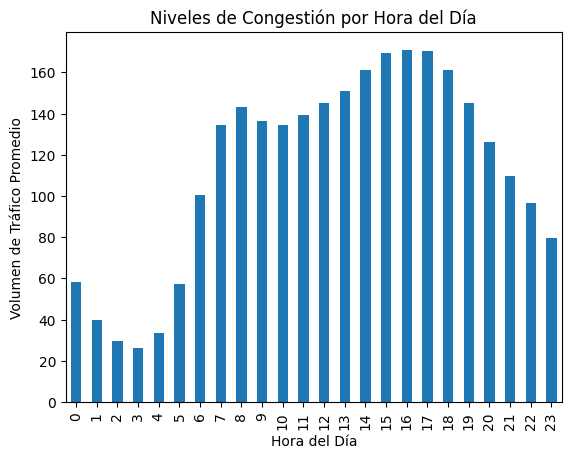

In [16]:
import matplotlib.pyplot as plt


# Agrupar datos por hora y calcular el volumen promedio
df['hour'] = df['DateTime'].dt.hour
hourly_traffic = df.groupby('hour')['Vol'].mean()

# Visualización de los niveles de congestión por hora del día
hourly_traffic.plot(kind='bar')
plt.title('Niveles de Congestión por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Volumen de Tráfico Promedio')
plt.show()


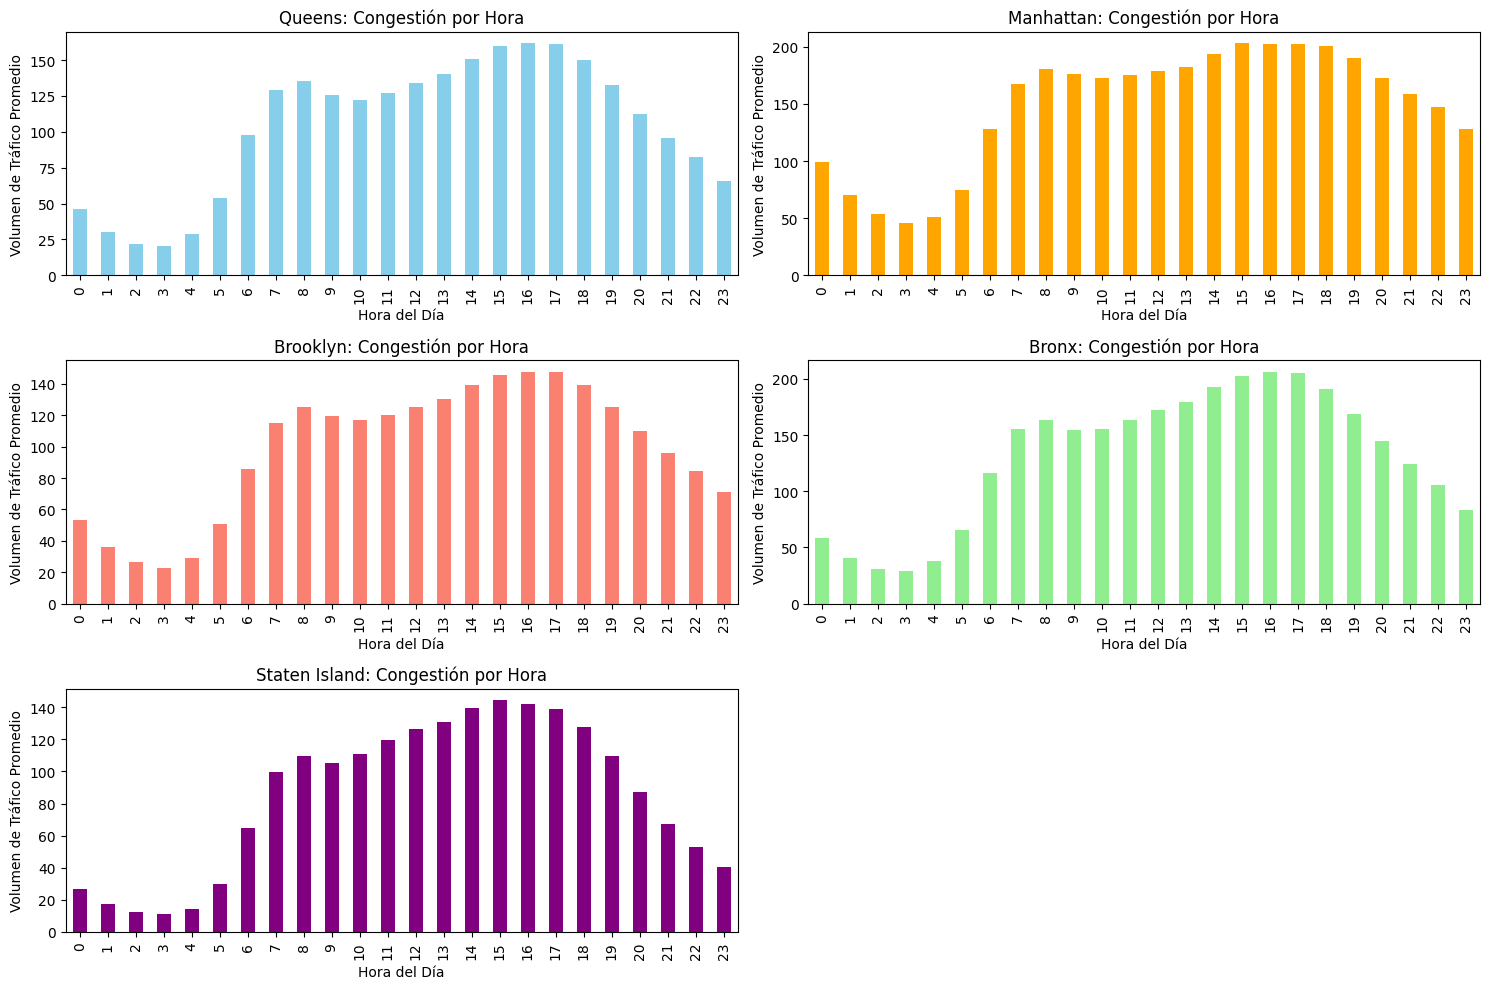

In [29]:
# Filtrar datos para cada zona
df_queens = df[df['Boro'] == 'Queens']
df_manhattan = df[df['Boro'] == 'Manhattan']
df_brooklyn = df[df['Boro'] == 'Brooklyn']
df_bronx = df[df['Boro'] == 'Bronx']
df_staten_island = df[df['Boro'] == 'Staten Island']

# Agrupar datos por hora y calcular el volumen promedio para cada zona
hourly_traffic_queens = df_queens.groupby(df_queens['DateTime'].dt.hour)['Vol'].mean()
hourly_traffic_manhattan = df_manhattan.groupby(df_manhattan['DateTime'].dt.hour)['Vol'].mean()
hourly_traffic_brooklyn = df_brooklyn.groupby(df_brooklyn['DateTime'].dt.hour)['Vol'].mean()
hourly_traffic_bronx = df_bronx.groupby(df_bronx['DateTime'].dt.hour)['Vol'].mean()
hourly_traffic_staten_island = df_staten_island.groupby(df_staten_island['DateTime'].dt.hour)['Vol'].mean()

# Visualización comparativa entre las cinco zonas
plt.figure(figsize=(15, 10))

# Congestión en Queens
plt.subplot(3, 2, 1)
hourly_traffic_queens.plot(kind='bar', color='skyblue')
plt.title('Queens: Congestión por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Volumen de Tráfico Promedio')

# Congestión en Manhattan
plt.subplot(3, 2, 2)
hourly_traffic_manhattan.plot(kind='bar', color='orange')
plt.title('Manhattan: Congestión por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Volumen de Tráfico Promedio')

# Congestión en Brooklyn
plt.subplot(3, 2, 3)
hourly_traffic_brooklyn.plot(kind='bar', color='salmon')
plt.title('Brooklyn: Congestión por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Volumen de Tráfico Promedio')

# Congestión en Bronx
plt.subplot(3, 2, 4)
hourly_traffic_bronx.plot(kind='bar', color='lightgreen')
plt.title('Bronx: Congestión por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Volumen de Tráfico Promedio')

# Congestión en Staten Island
plt.subplot(3, 2, 5)
hourly_traffic_staten_island.plot(kind='bar', color='purple')
plt.title('Staten Island: Congestión por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Volumen de Tráfico Promedio')

plt.tight_layout()
plt.show()


In [31]:
# Volúmenes de tráfico promedio diario para cada zona
average_traffic_queens = hourly_traffic_queens.mean()
average_traffic_manhattan = hourly_traffic_manhattan.mean()
average_traffic_brooklyn = hourly_traffic_brooklyn.mean()
average_traffic_bronx = hourly_traffic_bronx.mean()
average_traffic_staten_island = hourly_traffic_staten_island.mean()

# Mostrar los resultados
print(f'Queens: {average_traffic_queens:.2f}')
print(f'Manhattan: {average_traffic_manhattan:.2f}')
print(f'Brooklyn: {average_traffic_brooklyn:.2f}')
print(f'Bronx: {average_traffic_bronx:.2f}')
print(f'Staten Island: {average_traffic_staten_island:.2f}')


Queens: 103.51
Manhattan: 148.30
Brooklyn: 98.44
Bronx: 131.00
Staten Island: 84.53


In [40]:
import folium
import pandas as pd

# Definir las coordenadas de los centros de cada zona
locations = {
    'Queens': [40.7282, -73.7949],
    'Manhattan': [40.7831, -73.9712],
    'Brooklyn': [40.6782, -73.9442],
    'Bronx': [40.8448, -73.8648],
    'Staten Island': [40.5795, -74.1502]
}

# Crear un DataFrame con las coordenadas y los volúmenes de tráfico promedio
data = {
    'Boro': ['Queens', 'Manhattan', 'Brooklyn', 'Bronx', 'Staten Island'],
    'Vol': [average_traffic_queens, average_traffic_manhattan, average_traffic_brooklyn, average_traffic_bronx, average_traffic_staten_island],
    'Lat': [locations['Queens'][0], locations['Manhattan'][0], locations['Brooklyn'][0], locations['Bronx'][0], locations['Staten Island'][0]],
    'Lon': [locations['Queens'][1], locations['Manhattan'][1], locations['Brooklyn'][1], locations['Bronx'][1], locations['Staten Island'][1]]
}

df_map = pd.DataFrame(data)

# Crear un mapa centrado en Nueva York
m = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Añadir círculos para cada zona con detalles adicionales
colors = {
    'Queens': 'blue',
    'Manhattan': 'orange',
    'Brooklyn': 'red',
    'Bronx': 'green',
    'Staten Island': 'purple'
}

for _, row in df_map.iterrows():
    folium.CircleMarker(
        location=[row['Lat'], row['Lon']],
        radius=row['Vol'] * 0.1,  # Ajustar el tamaño proporcional al volumen
        color=colors[row['Boro']],
        fill=True,
        fill_color=colors[row['Boro']],
        popup=folium.Popup(f"<b>{row['Boro']}</b><br>Volumen de Tráfico Promedio: {row['Vol']:.2f}", max_width=300),
        tooltip=row['Boro']
    ).add_to(m)

# Añadir un cuadro de información
legend_html = '''
     <div style="position: fixed; 
     bottom: 50px; left: 50px; width: 150px; height: 170px; 
     border:2px solid grey; z-index:9999; font-size:14px;">
     &nbsp;<b>Volumen de Tráfico</b><br>
     &nbsp;<i class="fa fa-circle" style="color:blue"></i>&nbsp;Queens<br>
     &nbsp;<i class="fa fa-circle" style="color:orange"></i>&nbsp;Manhattan<br>
     &nbsp;<i class="fa fa-circle" style="color:red"></i>&nbsp;Brooklyn<br>
     &nbsp;<i class="fa fa-circle" style="color:green"></i>&nbsp;Bronx<br>
     &nbsp;<i class="fa fa-circle" style="color:purple"></i>&nbsp;Staten Island
     </div>
     '''
m.get_root().html.add_child(folium.Element(legend_html))

# Guardar el mapa en un archivo HTML
m.save('nyc_traffic_map.html')

# Mostrar el mapa en Jupyter Notebook (opcional)
m
